In [1]:
import torch
import numpy as np
import pandas as pd
import glob
import matplotlib.pyplot as plt
import sklearn.linear_model
import sklearn.metrics
from sklearn.model_selection import train_test_split
from torchviz import make_dot, make_dot_from_trace

In [2]:
path = r'/home/ksteadman/seniorproject/yearly/'
filenames = glob.glob(path + "20*.csv")

dfs = []
for filename in filenames:
    dfs.append(pd.read_csv(filename))

In [3]:
learn_df = pd.concat(dfs, ignore_index = True)
proj_df = pd.read_csv('/home/ksteadman/seniorproject/yearly/2019.csv')
learn_df

,Unnamed: 0,Player,Tm,Pos,Age,G,GS,Cmp,Att,Yds,...,FumblesLost,PassingYds,PassingTD,PassingAtt,RushingYds,RushingTD,RushingAtt,ReceivingYds,ReceivingTD,FantasyPoints
0,0,Priest Holmes,KAN,RB,29.0,14.0,14.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,1615.0,21.0,313.0,672.0,3.0,440.70
1,1,Ricky Williams,MIA,RB,25.0,16.0,16.0,0.0,0.0,0.0,...,4.0,0.0,0.0,0.0,1853.0,16.0,383.0,363.0,1.0,362.60
2,2,LaDainian Tomlinson,SDG,RB,23.0,16.0,16.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1683.0,14.0,372.0,489.0,1.0,384.20
3,3,Clinton Portis,DEN,RB,21.0,16.0,12.0,0.0,0.0,0.0,...,3.0,0.0,0.0,0.0,1508.0,15.0,273.0,364.0,2.0,316.20
4,4,Shaun Alexander,SEA,RB,25.0,16.0,16.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1175.0,16.0,295.0,460.0,2.0,328.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11895,581,Roland Williams,TAM,0,28.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
11896,582,Walter Young,CAR,0,24.0,7.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
11897,583,Joe Zelenka,JAX,0,27.0,16.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
11898,584,Chris Redman,BAL,QB,26.0,2.0,0.0,7.0,13.0,58.0,...,2.0,58.0,0.0,13.0,4.0,0.0,2.0,0.0,0.0,-5.28


In [4]:
onehotcols = ['Pos']
ohc = pd.get_dummies(learn_df[onehotcols], prefix=onehotcols, columns=onehotcols)
ohc_colsize = ohc.shape[1]
print(ohc_colsize)
df = pd.concat([learn_df, ohc], axis=1).reset_index()
df

5


,index,Unnamed: 0,Player,Tm,Pos,Age,G,GS,Cmp,Att,...,RushingTD,RushingAtt,ReceivingYds,ReceivingTD,FantasyPoints,Pos_0,Pos_QB,Pos_RB,Pos_TE,Pos_WR
0,0,0,Priest Holmes,KAN,RB,29.0,14.0,14.0,0.0,1.0,...,21.0,313.0,672.0,3.0,440.70,0,0,1,0,0
1,1,1,Ricky Williams,MIA,RB,25.0,16.0,16.0,0.0,0.0,...,16.0,383.0,363.0,1.0,362.60,0,0,1,0,0
2,2,2,LaDainian Tomlinson,SDG,RB,23.0,16.0,16.0,0.0,0.0,...,14.0,372.0,489.0,1.0,384.20,0,0,1,0,0
3,3,3,Clinton Portis,DEN,RB,21.0,16.0,12.0,0.0,0.0,...,15.0,273.0,364.0,2.0,316.20,0,0,1,0,0
4,4,4,Shaun Alexander,SEA,RB,25.0,16.0,16.0,0.0,0.0,...,16.0,295.0,460.0,2.0,328.50,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11895,11895,581,Roland Williams,TAM,0,28.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,1,0,0,0,0
11896,11896,582,Walter Young,CAR,0,24.0,7.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,1,0,0,0,0
11897,11897,583,Joe Zelenka,JAX,0,27.0,16.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,1,0,0,0,0
11898,11898,584,Chris Redman,BAL,QB,26.0,2.0,0.0,7.0,13.0,...,0.0,2.0,0.0,0.0,-5.28,0,1,0,0,0


In [5]:
cols = ['Age', 'G', 'GS', 'Cmp', 'Att',
       'Yds', 'Int', 'Tgt', 'Rec', 'Y/R', 'Fumbles',
       'FumblesLost', 'PassingYds', 'PassingTD', 'PassingAtt', 'RushingYds',
       'RushingTD', 'RushingAtt', 'ReceivingYds', 'ReceivingTD']
y = []
y_players = set(proj_df['Player'].tolist())
player_remove = set()
for idx in df.index:
    name = df.iloc[idx]['Player']
    if name in y_players:
        y.append(proj_df[proj_df['Player'] == name]['FantasyPoints'].iloc[0])
    else:
        player_remove.add(idx)
ymin = np.min(y)
#y = np.log((-ymin) + y + 1)
y = torch.tensor(y).float().cuda()
df = df.drop(index=player_remove)
ohc = df.iloc[:,-ohc_colsize:]
print(df.shape, ohc.shape, y.shape)
x = torch.tensor(df[cols].to_numpy()).float()
xmin = x.min(dim=0).values
xrange = (x.max(dim=0).values - x.min(dim=0).values)
xmean = x.mean(dim=0)
x = (x - xmean) / xrange
x = torch.tensor(x).cuda()
x = torch.cat([x, torch.tensor(ohc.to_numpy()).cuda()], dim=1)
print(y, x)

(2505, 34) (2505, 5) torch.Size([2505])
tensor([261.6800,   0.0000, 224.7600,  ..., 137.9000, 147.0000,  16.1000],
       device='cuda:0') tensor([[-0.0332,  0.2312,  0.5830,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.3001,  0.2312,  0.5830,  ...,  0.0000,  0.0000,  1.0000],
        [-0.1284,  0.2312,  0.5830,  ...,  0.0000,  0.0000,  0.0000],
        ...,
        [-0.2237,  0.1724,  0.0205,  ...,  0.0000,  1.0000,  0.0000],
        [-0.0808, -0.3571, -0.3545,  ...,  1.0000,  0.0000,  0.0000],
        [-0.0332,  0.2312, -0.4170,  ...,  0.0000,  0.0000,  1.0000]],
       device='cuda:0')


/tmp/ipykernel_679327/879146596.py:25: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x).cuda()


In [6]:
idxs = np.arange(0, x.shape[0])

idxs_train, idxs_tv = train_test_split(idxs, train_size = 0.8, shuffle=True)
idxs_val, idxs_test = train_test_split(idxs_tv, train_size = 0.2, shuffle=True)
#idxs_train


x_train = x[idxs_train]
x_val = x[idxs_val]
x_test = x[idxs_test]

y_train = torch.tensor(y[idxs_train]).float().cuda()
y_val = torch.tensor(y[idxs_val]).float().cuda()
y_test = torch.tensor(y[idxs_test]).float().cuda()

#xval.to_excel(r'/home/ksteadman/SP_Spring/val.xlsx', index = False)
y_train

#x_train, x_tv, y_train, y_tv = train_test_split(x, y, train_size = 0.8, shuffle=True) #80% train 
#x_val, x_test, y_val, y_test = train_test_split(x_tv, y_tv, test_size = 0.5, shuffle=True) #20% val and 20% test
#x_val, y_val

/tmp/ipykernel_679327/310143057.py:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train = torch.tensor(y[idxs_train]).float().cuda()
/tmp/ipykernel_679327/310143057.py:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_val = torch.tensor(y[idxs_val]).float().cuda()
/tmp/ipykernel_679327/310143057.py:14: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_test = torch.tensor(y[idxs_test]).float().cuda()


tensor([21.4000, 42.2600, 75.3000,  ...,  0.0000, 54.0000,  0.0000],
       device='cuda:0')

In [7]:
import wandb

sweep_config = {
  "name" : "my-sweep",
  "method" : "bayes",
  "metric": {
      "name" : "val_loss",
      "goal" : "minimize"
    },
  "parameters" : {
    "epochs" : {
      "values" : [100, 500, 1000]
    },
    "learning_rate" :{
      "min": 0.0001,
      "max": 0.1
    }
  }
}

sweep_id = wandb.sweep(sweep_config)

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Create sweep with ID: i5vthr4k
Sweep URL: https://wandb.ai/kgs131/uncategorized/sweeps/i5vthr4k


In [8]:
def build_network():
    network = torch.nn.Sequential(  # fully-connected, single hidden layer
        torch.nn.Linear(x.shape[1], 500),
        torch.nn.Dropout(),
        torch.nn.LogSigmoid(),
        torch.nn.Linear(500, 200),
        torch.nn.Dropout(),
        torch.nn.LogSigmoid(),
        torch.nn.Linear(200, 1))

    return network.cuda()

def build_optimizer(network, learning_rate):
    optimizer = torch.optim.Adam(network.parameters(), lr=learning_rate)
    return optimizer


def train_epoch(network, optimizer, criterion, x_train, y_train, x_val, y_val):
    TLPE = []
    VLPE = []
    TAPE = []
    VAPE = []            
    optimizer.zero_grad()
    train_pred = network(x_train)
    train_loss = criterion(train_pred, y_train.reshape(-1,1))
    val_pred = network(x_val)
    val_loss = criterion(val_pred, y_val.reshape(-1,1))
    train_error = sklearn.metrics.mean_squared_error(y_train.cpu().detach().tolist(), train_pred.cpu().detach().tolist(), squared = False)
    val_error = sklearn.metrics.mean_squared_error(y_val.cpu().detach().tolist(), val_pred.cpu().detach().tolist(), squared = False)
    print(train_loss.item(), val_loss.item(), train_error, val_error)
    TLPE.append(train_loss.item())
    VLPE.append(val_loss.item())
    TAPE.append(train_error)
    VAPE.append(val_error)
    train_loss.backward()
    optimizer.step()
    wandb.log({"Val Error": val_error})

    return val_error

In [9]:
def train(config=None):
    # Initialize a new wandb run
    with wandb.init(config=config):
        # If called by wandb.agent, as below,
        # this config will be set by Sweep Controller
        config = wandb.config

        network = build_network()
        optimizer = build_optimizer(network, config.learning_rate)
        criterion = torch.nn.MSELoss()

        for epoch in range(config.epochs):
            val_error = train_epoch(network, optimizer, criterion, x_train, y_train, x_val, y_val)
            wandb.log({"Error": val_error, "epoch": epoch}) 

In [10]:
wandb.agent(sweep_id, train, count=5)

wandb: Agent Starting Run: 12bpkdy1 with config:
wandb: 	epochs: 500
wandb: 	learning_rate: 0.027428845712200382
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: kgs131 (use `wandb login --relogin` to force relogin)


15109.8837890625 12177.0107421875 122.92227026563764 110.34949272431346
8460.9541015625 6419.84619140625 91.98344767556381 80.12394539237854
15513.1337890625 14772.294921875 124.55173357990746 121.54132954536414
8007.06787109375 7000.88623046875 89.4822199177743 83.67129633845131
7835.3671875 6061.447265625 88.51761109651345 77.85529818467528
9533.4189453125 7287.90673828125 97.63922803384337 85.36923669153173
10260.5927734375 7985.02099609375 101.29458355576567 89.3589449329231
9865.072265625 7739.69091796875 99.32306955639483 87.97551462080554
8726.35546875 6748.62353515625 93.41496581438886 82.15000869137636
7131.42626953125 5445.23046875 84.44777128491067 73.7918033030201
6119.05078125 4541.3984375 78.22436386487867 67.38990227199895
6707.44091796875 4963.02001953125 81.89897056043816 70.4487054622643
7726.0810546875 5993.17724609375 87.8981286600291 77.41561366338996
7352.908203125 6516.7119140625 85.74909895989958 80.72615261521489
6193.2626953125 4536.369140625 78.69728201311405

4705.02392578125 3275.737548828125 68.59317734429453 57.23405898610961
4652.89013671875 3518.065185546875 68.21209470051207 59.31328095050709
4769.7373046875 3398.74560546875 69.06328937493132 58.298762305907765
4606.83544921875 3308.837646484375 67.8736725877488 57.52249873434495
4694.7470703125 3619.716796875 68.51822477042555 60.164084220603606
4655.57080078125 3657.389404296875 68.23174489097988 60.476353325051036
4582.087890625 3553.639404296875 67.6911193161893 59.61240819169503
4688.560546875 3172.552490234375 68.47306378322025 56.32541490386649
4670.0927734375 3204.58642578125 68.33807982153546 56.60906707598562
4613.79345703125 3537.2861328125 67.92490844711412 59.475089522267325
4600.85546875 3527.265625 67.82960492677178 59.39078820914017
4695.7763671875 3404.73828125 68.52573585294333 58.35013587410102
4566.84814453125 3400.83837890625 67.57845936298006 58.31670843862915
4533.49658203125 3489.861572265625 67.3312437288125 59.075050821444684
4554.908203125 3662.954833984375 

4393.5498046875 3700.05859375 66.28386245063747 60.82810745486166
4362.5390625 3250.038330078125 66.04952025799986 57.009106590670086
4395.76123046875 3377.81201171875 66.30054098733844 58.118949445896085
4399.3896484375 3144.59619140625 66.32789580295807 56.076702611048056
4380.58056640625 3207.016845703125 66.18595118433022 56.63052998618587
4331.11083984375 3527.696533203125 65.81117418199594 59.39441653010187
4337.3681640625 3215.54248046875 65.85869580306401 56.70575390400913
4418.64697265625 3233.90625 66.47290620846613 56.867443791672144
4428.494140625 3444.28857421875 66.54692824733644 58.68806387720349
4283.2060546875 3465.706787109375 65.44620796602317 58.870254808307465
4321.9287109375 3250.16064453125 65.74137681930213 57.01017810663418
4380.96826171875 3123.4619140625 66.18888324820077 55.8879402877018
4390.2021484375 3264.37744140625 66.2586004319247 57.13473317975372
4387.53173828125 3614.654296875 66.23844389486277 60.12199721017403
4375.88525390625 3365.735595703125 66

4096.64111328125 3336.654052734375 64.00500883897352 57.76377755995811
4334.95849609375 3032.0859375 65.84040298085932 55.064380159305145
4166.4970703125 3193.789306640625 64.5484097098475 56.51362157932616
4327.12744140625 3021.256103515625 65.78090465668184 54.965957197258454
4239.328125 3032.078125 65.1101236775743 55.06430708015502
4329.21044921875 3761.274169921875 65.79673841218342 61.32922897455149
4221.2734375 3263.37939453125 64.9713309269957 57.125997951417176
4383.35546875 3406.40771484375 66.20691361255321 58.36443928678709
4217.373046875 3363.895263671875 64.94130529537502 57.99909842451305
4258.19140625 3407.81494140625 65.25482352259715 58.37649203813403
4161.8671875 3404.23046875 64.51253578637049 58.34578336898457
4258.0478515625 3714.8203125 65.25371568499997 60.949326292715924
4261.6396484375 3284.561767578125 65.28123363884896 57.31109850892163
4324.11572265625 3366.218017578125 65.75800838561081 58.01911938785004
4293.3583984375 3275.09521484375 65.52372439946289 5

Error,█▄▃▃▃▂▂▂▂▃▂▂▂▂▂▁▃▁▂▁▂▂▂▂▃▁▁▂▂▂▁▂▂▂▂▂▂▂▂▂
Val Error,█▄▃▃▃▂▂▂▂▃▂▂▂▂▂▁▃▁▂▁▂▂▂▂▃▁▁▂▂▂▁▂▂▂▂▂▂▂▂▂
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
Error,55.89378
Val Error,55.89378
epoch,499


wandb: Agent Starting Run: kux9uhmn with config:
wandb: 	epochs: 1000
wandb: 	learning_rate: 0.06811609132434661
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


15066.0341796875 12139.841796875 122.74376984417437 110.18095378062547
42511.1875 41851.08203125 206.18241402877015 204.57537192245974
9279.271484375 7206.9375 96.32897268392622 84.89368731266954
14829.52734375 11925.5068359375 121.77654131937723 109.20397150107193
14956.466796875 12037.0625 122.29663633754143 109.71354565310872
14977.62109375 12052.18359375 122.38308827251326 109.78243575646286
14942.0341796875 12023.4326171875 122.23761382415974 109.65141346248456
14864.0322265625 11942.779296875 121.91813646676505 109.28303157653559
14747.197265625 11852.255859375 121.43804068553925 108.86806933480123
14601.95703125 11716.564453125 120.83855510287663 108.24307999499113
14432.4130859375 11572.6494140625 120.13497547615304 107.57625327266697
14254.5205078125 11397.59765625 119.39229496061904 106.75952575790465
14053.5791015625 11188.51953125 118.54779020020054 105.77580342416046
13852.4052734375 11058.45703125 117.69624330609827 105.15920014822774
13637.6513671875 10851.20703125 116.7

8054.78515625 6382.49365234375 89.74845273086237 79.89050987220588
8073.6953125 6408.70361328125 89.8537430573337 80.0543801732251
7991.4541015625 6455.841796875 89.39493435101683 80.34825750366872
8069.8564453125 6309.931640625 89.83237758384816 79.43507877944415
8065.36767578125 6353.919921875 89.80739451502093 79.71147925789107
8033.17333984375 6524.982421875 89.627970439913 80.77736313978643
7997.951171875 6291.35546875 89.43126554144462 79.31806516005662
8046.337890625 6562.9619140625 89.70138199362032 81.01211036768677
8061.71435546875 6328.095703125 89.78705370764708 79.54932697238206
8007.04296875 6479.31884765625 89.48208161495552 80.4942137129459
8013.4443359375 6495.4990234375 89.51784104350881 80.59466036863451
8028.89501953125 6164.15380859375 89.60410097854776 78.51212307568292
8060.30029296875 6340.91357421875 89.77917501012317 79.62985404740449
8069.45947265625 6612.2041015625 89.83017100576816 81.3154627545332
7990.8271484375 6299.6083984375 89.39142635796634 79.370071

8047.80322265625 6480.8359375 89.70955145251202 80.5036409614664
8033.0556640625 6113.27685546875 89.62731577460103 78.18744571204003
8031.62255859375 6378.07470703125 89.61932023924416 79.86285070410494
7985.87109375 6280.50244140625 89.36370055958496 79.24962035824588
8038.970703125 6409.263671875 89.66030783140411 80.05787407929299
8053.67822265625 6518.607421875 89.74228824023685 80.73789655085194
8005.0419921875 6215.72216796875 89.47090058967096 78.83985559960266
8043.8642578125 6577.7060546875 89.68759528685224 81.1030589454709
8107.81787109375 6251.2978515625 90.04342147319001 79.06514944479497
8073.01708984375 6336.87841796875 89.84996713660752 79.60451786239295
8035.412109375 6197.576171875 89.64046043639352 78.72468613846347
8079.84423828125 6475.4921875 89.88795364496886 80.47044447511479
8134.8642578125 6422.65625 90.1934829967848 80.14147608726427
8012.74755859375 6357.02099609375 89.51395377115318 79.73093076161943
8000.59521484375 6248.84423828125 89.4460447661677 79.04

8028.2626953125 6147.7734375 89.60057155845251 78.4077431768075
8010.65234375 6418.04296875 89.50224858754615 80.11268875435579
8075.88427734375 6440.794921875 89.86592423236269 80.25456507335024
8074.513671875 6402.49365234375 89.85829529752858 80.01558284458828
8081.27880859375 6343.15087890625 89.89593422054504 79.64389937188179
8053.4306640625 6548.2177734375 89.74090914539238 80.92106231614954
8017.9619140625 6413.31982421875 89.54307404883711 80.08320822463527
7967.1767578125 6492.66357421875 89.25903962968113 80.57707120914648
8057.93701171875 6359.92724609375 89.76601345848582 79.74915722420712
7964.53662109375 6508.10791015625 89.24425089984427 80.67284446578375
7992.87158203125 6447.29345703125 89.40286458468707 80.29504112993487
8087.58203125 6231.345703125 89.93098710934652 78.93887052980823
7987.4560546875 6333.85302734375 89.37256898072945 79.58550929011787
8020.5947265625 6175.30126953125 89.55777510974626 78.58308314160787
8044.2783203125 6427.984375 89.68990123672062 8

8066.69580078125 6378.3583984375 89.8147837148489 79.86462583945583
8076.34521484375 6421.158203125 89.86849035872343 80.13212993120119
8012.96826171875 6180.02978515625 89.51518357128897 78.6131683221193
8033.97607421875 6479.6787109375 89.63244960780372 80.49645481527962
8077.63720703125 6445.1396484375 89.87567591946475 80.28162927221821
7982.22705078125 6615.93408203125 89.34330815860976 81.33839608294238
8004.29248046875 6036.85986328125 89.46671123465383 77.6972345571284
8048.33837890625 6657.22119140625 89.71253107442462 81.59179403844742
7977.79345703125 6306.8037109375 89.3184920986052 79.4153898553391
8093.265625 6489.05712890625 89.96257776326519 80.55468909415943
7971.4609375 6740.36669921875 89.28303794460646 82.09973968411775
8044.798828125 6646.29248046875 89.69280094324614 81.52479311936624
8022.69482421875 6322.90625 89.56949773122378 79.51670430892908
8065.2041015625 6001.5478515625 89.8064804810255 77.46965846020574
7977.3662109375 6331.96337890625 89.31610417379416 

8088.96337890625 6359.75732421875 89.93866893391613 79.74808767582526
8056.85009765625 6222.51611328125 89.75995998109173 78.88292555655373
8004.0068359375 6457.11474609375 89.46511618894273 80.35617592296644
8031.501953125 6401.82177734375 89.6186520404098 80.01138551920381
8001.49755859375 6328.95751953125 89.45108801592578 79.55474574960381
8001.47216796875 6334.28125 89.45094900903867 79.58819590621755
8010.9833984375 6274.96240234375 89.50409605391268 79.21466225997413
8006.3173828125 6771.21337890625 89.47802526332633 82.28738552313382
8020.4423828125 6237.41357421875 89.55692419555723 78.97730036969463
8001.40478515625 6227.7275390625 89.45056939357036 78.91595455634426
8042.87255859375 6400.20751953125 89.68206466983678 80.0012984320401
7990.08251953125 6301.68798828125 89.38726135883378 79.38317297351533
7969.75634765625 6217.50634765625 89.27349547798288 78.85116446351368
8046.33447265625 6319.02685546875 89.70136435881746 79.49230711389214
8051.82666015625 6552.1904296875 89

8046.34814453125 6427.45751953125 89.70144023275988 80.17142555095266
8090.767578125 6315.88818359375 89.94869388758988 79.47256312686302
8055.9931640625 6341.61474609375 89.75518444908033 79.6342542531003
8058.95166015625 6496.93994140625 89.77166238821617 80.60359820149367
8005.36376953125 5992.04541015625 89.47269723074726 77.40830398585959
8022.3115234375 6024.0537109375 89.56735473044829 77.61478225424204
8028.84619140625 6403.9609375 89.60382820026607 80.02475665802216
8082.25341796875 6175.9384765625 89.90135522637608 78.58713843862246
7998.5556640625 6414.1591796875 89.434645891204 80.08844822932211
8028.1025390625 6581.35400390625 89.59968111764547 81.12554534106114
8069.4736328125 6296.82177734375 89.83024754501605 79.35251670990901
8027.087890625 6402.716796875 89.5940169444118 80.01697986977815
8037.60107421875 6225.845703125 89.65266894742787 78.90402944979527
7991.25830078125 6307.7861328125 89.39383872085288 79.42157195051792
8057.13232421875 6371.91748046875 89.76153086

7991.93212890625 6429.9716796875 89.39761025410453 80.18710589738399
8022.75244140625 6182.56689453125 89.56982038213086 78.62929938819606
8065.12939453125 6263.69287109375 89.80606571721756 79.14349814420224
7990.255859375 6270.93408203125 89.38823231608868 79.18923188638065
8116.4951171875 6567.48193359375 90.0915927710088 81.04000103036083
7970.89013671875 6279.10986328125 89.27984104004823 79.24083336803682
8028.6005859375 6299.8583984375 89.60246403990325 79.37164821634839
8026.8623046875 6350.22607421875 89.59275921384722 79.68830778744297
8049.86669921875 6398.353515625 89.72105180908895 79.9897094354394
8100.3125 6421.6708984375 90.0017355321225 80.13533235029577
8050.4150390625 6336.66845703125 89.72410736255706 79.60319797992389
8067.8193359375 6079.0634765625 89.82103883785102 77.96835147359089
8039.70166015625 6492.67431640625 89.66438420820015 80.57713642179212
8040.0048828125 6373.60107421875 89.66607572759135 79.83483987854805
8017.1005859375 6235.98974609375 89.53826487

Error,█▃▁▁▁▁▁▁▁▁▁▁▁▁▁▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▂▁
Val Error,█▃▁▁▁▁▁▁▁▁▁▁▁▁▁▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▂▁
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
Error,80.27218
Val Error,80.27218
epoch,999


wandb: Agent Starting Run: ro6edc1h with config:
wandb: 	epochs: 100
wandb: 	learning_rate: 0.00952875192018519
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


14985.73046875 12059.8876953125 122.41621948544643 109.81752022376796
12395.3466796875 9677.4384765625 111.33439121231773 98.3739719138827
9808.798828125 7629.6396484375 99.03937571658246 87.34781053593801
7910.42626953125 6179.44873046875 88.94057524308263 78.6094685884533
8116.25634765625 6948.8271484375 90.09026886616643 83.35962748947527
9147.7802734375 8097.80712890625 95.64403009946061 89.98781597869143
8941.48828125 8017.42236328125 94.55944258255853 89.54005868330914
7856.67041015625 6810.96630859375 88.63786159701162 82.52857917131523
7248.47314453125 6050.43359375 85.13796518369341 77.78453214083143
7083.1806640625 5505.72998046875 84.16163234305571 74.20060618756938
7195.0908203125 5513.1923828125 84.82388132733871 74.25087607790269
7384.8955078125 5742.3994140625 85.93541604101628 75.77862270851108
7350.56201171875 5667.69970703125 85.73541778560791 75.28413259136929
7252.7783203125 5654.7373046875 85.16324554450524 75.19798721307123
6999.84423828125 5362.3466796875 83.6650

Error,█▅▅▄▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
Val Error,█▅▅▄▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
Error,58.07749
Val Error,58.07749
epoch,99


wandb: Agent Starting Run: wtgzulax with config:
wandb: 	epochs: 100
wandb: 	learning_rate: 0.09942849025247712
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


15162.16796875 12227.939453125 123.1347516430546 110.58002042753385
152263.234375 155434.359375 390.2092182663654 394.2516529656662
8616.087890625 6571.47607421875 92.82288687555786 81.06464504352361
15120.36328125 12189.6005859375 122.96488680244876 110.40652733438908
15434.56640625 12477.9599609375 124.23593280064495 111.7047938352267
15633.1376953125 12660.2548828125 125.0325478738758 112.51779377696016
15738.7021484375 12753.1357421875 125.45398215656544 112.92978865579056
15764.48828125 12776.248046875 125.55670925079639 113.03206771526824
15730.8056640625 12744.763671875 125.42250930956531 112.8927095283471
15631.900390625 12668.287109375 125.02759775302178 112.55348621911277
15494.5185546875 12562.3173828125 124.4769796918424 112.08174878728848
15333.34765625 12377.736328125 123.82789456968689 111.25527757954282
15126.013671875 12154.673828125 122.98785937191711 110.2482381186773
14902.09765625 11962.318359375 122.07414952541225 109.37238617643798
14641.2578125 11777.947265625 1

Error,█▂███▇▇▆▆▅▄▄▃▃▂▂▂▁▁▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
Val Error,█▂███▇▇▆▆▅▄▄▃▃▂▂▂▁▁▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
Error,79.48208
Val Error,79.48208
epoch,99


wandb: Agent Starting Run: dw83zeiy with config:
wandb: 	epochs: 100
wandb: 	learning_rate: 0.016950354993524833
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


15145.0390625 12212.5146484375 123.06518070253138 110.51024833942752
10615.0986328125 8147.28466796875 103.02960367761501 90.26230986858565
7840.65478515625 6140.38916015625 88.54747041550536 78.36063777962106
10339.3330078125 9122.017578125 101.68251664656142 95.50925156324507
8680.10546875 7801.10791015625 93.16708294750087 88.32388467538681
7274.84814453125 6214.17919921875 85.29272094782321 78.83006552193469
7395.294921875 5533.7236328125 85.99589922509787 74.38900267656739
7813.76025390625 5727.8125 88.39547890547067 75.68231456070478
7854.275390625 6050.10986328125 88.62434855870329 77.7824556085668
7420.55908203125 5882.71875 86.14266608641206 76.69888411573581
6850.92822265625 5048.1669921875 82.77033260007245 71.05045253888014
6268.91455078125 4973.509765625 79.17647914601801 70.52311395112709
6346.24560546875 5228.43115234375 79.66332707863374 72.30789297601066
6736.11572265625 5472.20361328125 82.07384376122391 73.97434553447813
6679.5478515625 5325.7919921875 81.72850054654

Error,█▄▄▃▃▃▃▂▂▂▂▂▂▁▂▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
Val Error,█▄▄▃▃▃▃▂▂▂▂▂▂▁▂▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
Error,57.53748
Val Error,57.53748
epoch,99


In [11]:

model = torch.nn.Sequential(
    torch.nn.Linear(x.shape[1], 500),
    torch.nn.Dropout(),
    torch.nn.LogSigmoid(),
    torch.nn.Linear(500, 200),
    torch.nn.Dropout(),
    torch.nn.LogSigmoid(),
    torch.nn.Linear(200, 1)
)
model.cuda()


Sequential(
  (0): Linear(in_features=25, out_features=500, bias=True)
  (1): Dropout(p=0.5, inplace=False)
  (2): LogSigmoid()
  (3): Linear(in_features=500, out_features=200, bias=True)
  (4): Dropout(p=0.5, inplace=False)
  (5): LogSigmoid()
  (6): Linear(in_features=200, out_features=1, bias=True)
)

In [12]:
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.016824394620345177)

In [13]:
TLPE = []
VLPE = []
TAPE = []
VAPE = []
for epoch in range(150):
    optimizer.zero_grad()
    train_pred = model(x_train)
    train_loss = criterion(train_pred, y_train.reshape(-1,1))
    val_pred = model(x_val)
    val_loss = criterion(val_pred, y_val.reshape(-1,1))
    train_error = sklearn.metrics.mean_squared_error(y_train.cpu().detach().tolist(), train_pred.cpu().detach().tolist(), squared = False)
    val_error = sklearn.metrics.mean_squared_error(y_val.cpu().detach().tolist(), val_pred.cpu().detach().tolist(), squared = False)
    print(train_loss.item(), val_loss.item(), train_error, val_error)
    TLPE.append(train_loss.item())
    VLPE.append(val_loss.item())
    TAPE.append(train_error)
    VAPE.append(val_error)
    train_loss.backward()
    optimizer.step()

15109.63671875 12176.666015625 122.92126146389992 110.34792982791988
10631.4619140625 8220.1796875 103.10898222106925 90.66520532002936
7793.9638671875 6009.56591796875 88.28342937836513 77.52139486858154
10135.5087890625 9071.8193359375 100.67526313337977 95.24609691837651
8739.3994140625 7635.072265625 93.4847493189417 87.37889834054536
7255.39208984375 6317.228515625 85.17859047168002 79.4809937766999
7288.1328125 5409.38232421875 85.3705603318151 73.54850281697114
7679.87353515625 5881.26806640625 87.63488878974783 76.68942607164173
7822.71337890625 5944.23681640625 88.44610824088494 77.09887699358262
7407.98388671875 5647.67822265625 86.06964432642333 75.1510354599607
6767.7470703125 5193.04736328125 82.26631629812805 72.06280118137578
6309.04443359375 4924.94677734375 79.4294936226751 70.17796522502847
6321.02978515625 5055.830078125 79.50490696300102 71.10436234774788
6538.43310546875 5490.30908203125 80.86057750780097 74.09662153174962
6677.5927734375 5754.0400390625 81.7165411

4731.68359375 2977.104248046875 68.78723293581105 54.56284683412225
4784.9716796875 3392.036865234375 69.1734905839695 58.241196997247485
4811.06982421875 3294.6044921875 69.36187612892782 57.39864748301338
4750.375 3471.27294921875 68.92296451180746 58.91751334667715
4784.52880859375 3626.541748046875 69.17028790717106 60.22077675753855
4692.78857421875 3312.735595703125 68.50393034263764 57.55636702644968
4705.46435546875 3220.985595703125 68.59638987697534 56.75372992500829
4672.29638671875 3100.127685546875 68.35419723763505 55.67879046953497
4712.458984375 3192.11328125 68.64735125895281 56.49879117529991
4699.24267578125 3109.20556640625 68.55102256810632 55.76025314429587
4692.06005859375 3586.631103515625 68.49861369362748 59.88849154372594
4586.2509765625 3297.708740234375 67.7218683045546 57.42568301123416
4685.43212890625 3194.94189453125 68.45021808587991 56.523815273137295
4560.48095703125 3527.6767578125 67.5313342795769 59.394250808984815
4803.02392578125 3756.1730957031

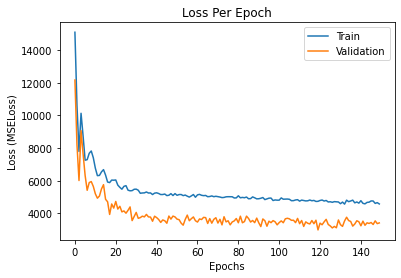

In [14]:
plt.plot(range(len(TLPE)), TLPE, label="Train")
plt.plot(range(len(VLPE)), VLPE, label="Validation")
plt.title("Loss Per Epoch")
plt.xlabel("Epochs")
plt.ylabel("Loss (MSELoss)")
plt.legend()

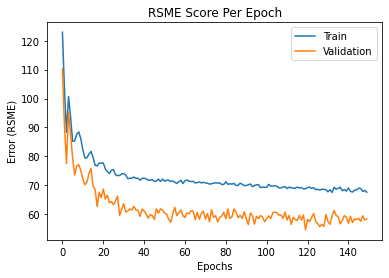

In [15]:
plt.plot(range(len(TAPE)), TAPE, label="Train")
plt.plot(range(len(VAPE)), VAPE, label="Validation")
plt.title("RSME Score Per Epoch")
plt.xlabel("Epochs")
plt.ylabel("Error (RSME)")
plt.legend()

In [16]:
prediction = model(x_train)
prediction

tensor([[41.5989],
        [41.5238],
        [58.0983],
        ...,
        [40.3527],
        [53.2526],
        [ 4.0348]], device='cuda:0', grad_fn=<AddmmBackward0>)

In [17]:
val_df = df.iloc[idxs_val].copy()
val_df['Pred'] = model(x_val).detach().cpu()
print(val_df[['FantasyPoints', 'Pred']])

      FantasyPoints        Pred
7729         341.60  203.538071
2134          16.90   73.875626
3094         128.50   81.080032
2047          34.54   55.842426
2341           0.00    9.813418
...             ...         ...
6355           4.30   51.435123
6083          87.30   92.646324
2256           0.80   30.378027
2000          61.90   65.567833
6048         114.80  146.722672

[100 rows x 2 columns]


In [18]:
error = ((model(x_train)).reshape(y_train.shape).detach().cpu() - y_train.cpu())
error

tensor([34.4394, -3.6981, -3.3304,  ..., 30.3548, -3.2516,  8.8590])

Text(0, 0.5, 'Player Count')

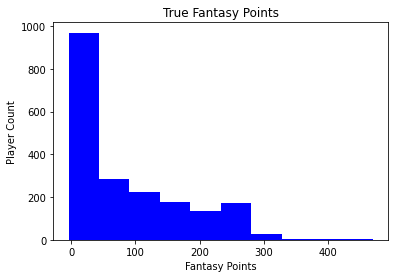

In [35]:
realtrain = y_train.detach().cpu().tolist()
plt.hist(realtrain, 10, facecolor='blue')
plt.title("True Fantasy Points")
plt.xlabel("Fantasy Points")
plt.ylabel("Player Count")

(0.0, 400.0)

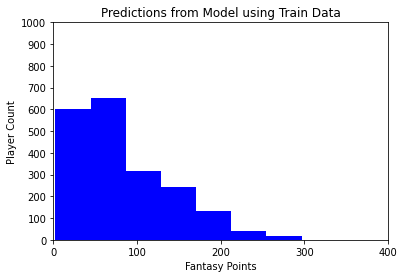

In [38]:
pred = prediction.detach().cpu().reshape(-1).tolist()
plt.hist(prediction.detach().cpu().reshape(-1).tolist(), 10, facecolor='blue')
plt.title("Predictions from Model using Train Data")
plt.xlabel("Fantasy Points")
plt.ylabel("Player Count")
plt.xticks(np.arange(0, max(pred) + 100, 100.0))
plt.yticks(np.arange(0, 1000 + 100, 100.0))
plt.xlim(0, 400)

Text(0, 0.5, 'Count')

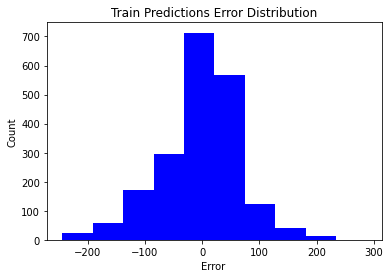

In [21]:
plt.hist(error.tolist(), 10, facecolor='blue')
plt.title("Train Predictions Error Distribution")
plt.xlabel("Error ")
plt.ylabel("Count")

In [22]:
test = model(x_test)
test

tensor([[213.0093],
        [185.1551],
        [ 47.8464],
        [149.4619],
        [ 81.6860],
        [ 61.9119],
        [191.3731],
        [186.3624],
        [106.5298],
        [ 65.9852],
        [ 44.4522],
        [ 43.8575],
        [200.2918],
        [ 62.9647],
        [126.0552],
        [139.2616],
        [117.4083],
        [ 50.9574],
        [145.5371],
        [133.2881],
        [117.4360],
        [ 52.8942],
        [ 39.2228],
        [ 79.9607],
        [  8.1174],
        [ 95.1922],
        [ 70.6187],
        [195.0880],
        [ 77.4191],
        [251.2427],
        [ 42.0471],
        [ 18.3375],
        [100.7511],
        [ 51.3235],
        [146.9411],
        [102.6198],
        [ 28.0965],
        [ 68.6262],
        [ 53.6946],
        [ 69.1821],
        [ 55.4398],
        [138.7490],
        [ 52.4289],
        [196.0834],
        [ 47.6671],
        [128.0374],
        [ 26.6542],
        [ 29.3644],
        [ 69.0350],
        [ 33.3572],


(0.0, 400.0)

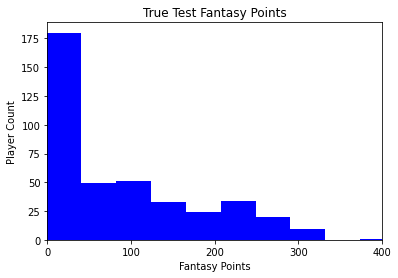

In [23]:
true_test = y_test.detach().cpu()
plt.hist(true_test.reshape(-1).tolist(), 10, facecolor='blue')
plt.title("True Test Fantasy Points")
plt.xlabel("Fantasy Points")
plt.ylabel("Player Count")
plt.xticks(np.arange(0, max(pred) + 100, 100.0))
plt.xlim(0, 400)

In [24]:
test_err = ((model(x_test).reshape(y_test.shape)).detach().cpu() - y_test.cpu())
model(x_test).reshape(y_test.shape).shape, y_test.shape, test_err.shape

(torch.Size([401]), torch.Size([401]), torch.Size([401]))

(0.0, 400.0)

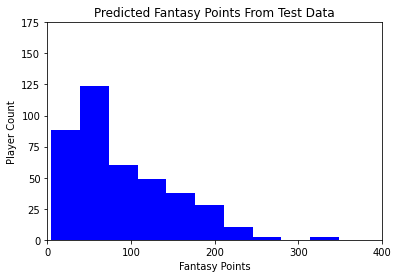

In [40]:
plt.hist(test.detach().cpu().reshape(-1).tolist(), 10, facecolor='blue')
plt.title("Predicted Fantasy Points From Test Data")
plt.xlabel("Fantasy Points")
plt.ylabel("Player Count")
plt.xticks(np.arange(0, max(pred) + 100, 100.0))
plt.yticks(np.arange(0, 175 + 25, 25))
plt.xlim(0, 400)

Text(0, 0.5, 'Count')

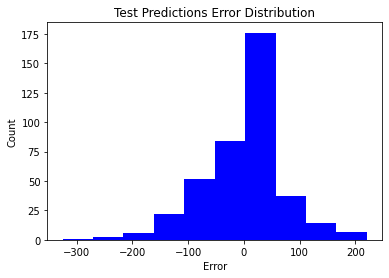

In [26]:
plt.hist(test_err.detach().cpu().reshape(-1).tolist(), 10, facecolor='blue')
plt.title("Test Predictions Error Distribution")
plt.xlabel("Error")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

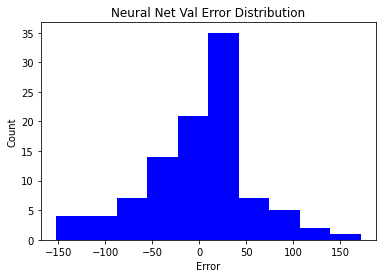

In [27]:
valerror = model(x_val).reshape(y_val.shape).detach().cpu() - y_val.cpu()
valerror = valerror.numpy()
plt.hist(valerror.tolist(), 10, facecolor='blue')
plt.title("Neural Net Val Error Distribution")
plt.xlabel("Error")
plt.ylabel("Count")

In [28]:
valerror = np.absolute(valerror)
print(valerror)
print("avg val error: ", np.mean(valerror))

[ 42.293198    33.284904    40.662674    28.133064    12.90678
  95.78314      1.4277954  151.70312    106.3308      77.934326
  51.780838    20.759418    49.8237      55.848522     9.346054
  16.63018     24.725561    19.5906      32.416496    12.76162
  96.0869      57.634514     8.595849    30.539879    26.73605
 120.16341     11.388237    19.271362   114.3          0.46107483
 108.348015    11.190109    42.341347    38.69892     10.907387
  18.86329     90.2749      49.108116    24.259308    11.634922
  62.433212    47.123146    81.421104    24.136658     4.7491302
 116.46512     25.94844     56.684444    46.297966    86.53801
  16.306238    90.207306    25.531937   152.42659     22.749249
  29.150234     3.2582684   26.475368     7.537396    19.43766
  20.71036      2.9938636    0.786911    33.70175     25.944962
  61.238525    23.844833    18.143093    23.054245     5.807541
  27.732574    49.65673     85.288605    16.9295      48.60353
   8.432644    90.44592     16.685535    30

Text(0, 0.5, 'Count')

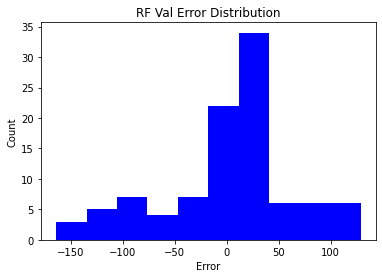

In [29]:
# random forest
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(x_train.detach().cpu(), y_train.detach().cpu())
error = torch.tensor(regr.predict(x_val.detach().cpu())) - y_val.detach().cpu()
error = error.numpy()
plt.hist(error.reshape(-1).tolist(), 10, facecolor='blue')
plt.title("RF Val Error Distribution")
plt.xlabel("Error")
plt.ylabel("Count")

In [30]:
error = np.absolute(error)
print(error)
print("avg val error:", error.mean())

[ 82.48568216  23.38222264   3.84714494   8.31482713  39.29547249
  92.89955719  23.00384165 109.61357113 102.57821431  10.90134879
  81.90846773  15.59547173   6.34336791  79.55285277  19.60926685
  39.29547249   8.39547287   8.94299019  22.03201366  15.53201607
 103.04095325 128.65662598 100.6464517   39.29547249  28.1674442
 115.38245693  15.58368264  27.00453056 122.83846335  13.75989368
 106.20452751  16.49547326  39.59547251  16.0163414   40.01294439
  21.09366135  43.32967052  10.67922022   1.54730255   9.96556075
  96.34336791   3.47198477  65.24880371  37.19547259  48.47198477
  40.14937213  13.75582779   4.19430373  29.36154266 139.36802683
  67.54067638  62.85839176  24.00452674 125.90452446  36.19547259
  34.9954723   80.1193345   36.29547249  39.29547249   8.02229725
  15.89547287 127.17198172  14.38945308  38.99547248  24.63430522
  82.81463381  26.46053372  24.59547268  63.53328303   3.73201442
   4.97198477   0.57565268 164.21169877   5.63201594  85.08734535
  41.928101

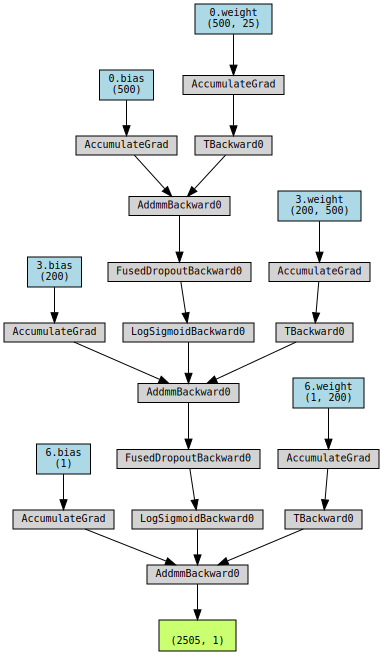

In [31]:
make_dot(model(x), params=dict(model.named_parameters()))